In [33]:
import io
import pandas as pd
import bs4
import urllib
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import itertools
import collections
import networkx as nx
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from PIL import Image
import PIL.ImageOps
import random
from wordcloud import ImageColorGenerator

from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS

from gensim import corpora, models
import gensim

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [34]:
f = open("C:/Python/Project/chaplin_speech.txt","r")
data=f.read()
f.close()
print(data)

I'm sorry but I don't want to be an Emperor, that's not my business. 
I don't want to rule or conquer anyone. 
I should like to help everyone if possible, Jew, gentile, black man, white. 
We all want to help one another, human beings are like that. 
We want to live by each other's happiness, not by each other's misery. 
We don't want to hate and despise one another. 
In this world there is room for everyone and the good earth is rich and can provide for everyone.
The way of life can be free and beautiful. 
But we have lost the way.

Greed has poisoned men's souls, has barricaded the world with hate;
has goose-stepped us into misery and bloodshed.

We have developed speed but we have shut ourselves in:
machinery that gives abundance has left us in want.
Our knowledge has made us cynical,
our cleverness hard and unkind.
We think too much and feel too little:
More than machinery we need humanity;
More than cleverness we need kindness and gentleness.

Without these qualities, life will be 

In [35]:
stop_words = stopwords.words("english")
from nltk import bigrams

expression = "[^a-zA-Z0-9 ]"
cleantextCAP = re.sub(expression, '', data)
cleantext = cleantextCAP.lower() # lower case 
print(cleantext)

im sorry but i dont want to be an emperor thats not my business i dont want to rule or conquer anyone i should like to help everyone if possible jew gentile black man white we all want to help one another human beings are like that we want to live by each others happiness not by each others misery we dont want to hate and despise one another in this world there is room for everyone and the good earth is rich and can provide for everyonethe way of life can be free and beautiful but we have lost the waygreed has poisoned mens souls has barricaded the world with hatehas goosestepped us into misery and bloodshedwe have developed speed but we have shut ourselves inmachinery that gives abundance has left us in wantour knowledge has made us cynicalour cleverness hard and unkindwe think too much and feel too littlemore than machinery we need humanitymore than cleverness we need kindness and gentlenesswithout these qualities life will be violent and all will be lostthe aeroplane and the radio h

In [36]:
text_file = open("CharlieOutput.txt", "w")
text_file.write(str(cleantext))
text_file.close()

dat = list(cleantext.split())
dict1 = {}
for i in range(len(dat)):
    word = dat[i]
    dict1[word] = dat.count(word)

keys = list(dict1)
filtered_words = [word for word in keys if word not in stopwords.words('english')]
dict2  = dict((k, dict1[k]) for k in filtered_words if k in filtered_words)

print (dict2)

{'im': 1, 'sorry': 1, 'dont': 6, 'want': 5, 'emperor': 1, 'thats': 1, 'business': 1, 'rule': 1, 'conquer': 1, 'anyone': 1, 'like': 3, 'help': 2, 'everyone': 2, 'possible': 1, 'jew': 1, 'gentile': 1, 'black': 1, 'man': 2, 'white': 1, 'one': 3, 'another': 2, 'human': 2, 'beings': 1, 'live': 1, 'others': 2, 'happiness': 2, 'misery': 3, 'hate': 5, 'despise': 2, 'world': 8, 'room': 1, 'good': 1, 'earth': 1, 'rich': 1, 'provide': 1, 'everyonethe': 1, 'way': 2, 'life': 4, 'free': 4, 'beautiful': 2, 'lost': 1, 'waygreed': 1, 'poisoned': 1, 'mens': 2, 'souls': 1, 'barricaded': 1, 'hatehas': 1, 'goosestepped': 1, 'us': 13, 'bloodshedwe': 1, 'developed': 1, 'speed': 1, 'shut': 1, 'inmachinery': 1, 'gives': 1, 'abundance': 1, 'left': 1, 'wantour': 1, 'knowledge': 1, 'made': 1, 'cynicalour': 1, 'cleverness': 2, 'hard': 1, 'unkindwe': 1, 'think': 2, 'much': 1, 'feel': 2, 'littlemore': 1, 'machinery': 1, 'need': 2, 'humanitymore': 1, 'kindness': 1, 'gentlenesswithout': 1, 'qualities': 1, 'violent': 1

In [37]:
def SequenceSelection(dictionary, length, startindex = 0): 
    
    
    lengthDict = len(dictionary)
    if length > lengthDict:
        return print("length is longer than dictionary length");
    else:
        d = dictionary
        items = [(v, k) for k, v in d.items()]
        items.sort()
        items.reverse()   
        itemsOut = [(k, v) for v, k in items]
    
        highest = itemsOut[startindex:startindex + length]
        dd = dict(highest)
        wanted_keys = dd.keys()
        dictshow = dict((k, d[k]) for k in wanted_keys if k in d)

        return dictshow;
dictshow = SequenceSelection(dictionary = dict2, length = 7, startindex = 0)

print(dictshow)



{'us': 13, 'men': 12, 'world': 8, 'power': 7, 'people': 6, 'let': 6, 'fight': 6}


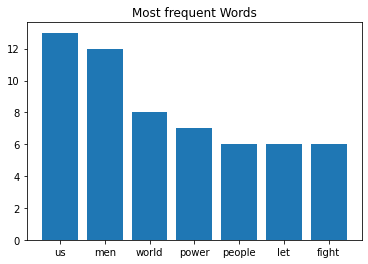

In [38]:
n = range(len(dictshow))
plt.bar(n, dictshow.values(), align='center')
plt.xticks(n, dictshow.keys())
plt.title("Most frequent Words")
plt.savefig("FrequentWords.png", transparent=True)

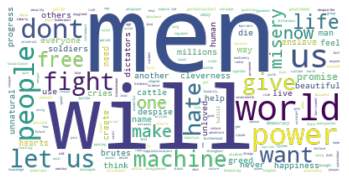

In [39]:
root_path = os.getcwd()
with open(path.join(root_path, 'CharlieOutput.txt'), 'r', encoding='utf-8', errors='ignore') as outout_file:
    text = outout_file.readlines()



stopwords = set(STOPWORDS)
stopwords.add("said")


wc = WordCloud(max_words=1000, 
               stopwords=stopwords, mode='RGBA', background_color=None)

wc.generate(text[0])

wc.to_file(path.join(root_path, "Chaplin_speech1.png"))

plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()

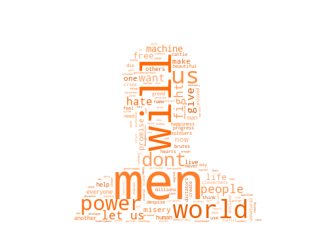

In [40]:

#tfidf = models.TfidfModel(corpus)


def orange_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(24, 99%%, %d%%)" % random.randint(40, 70)


chaplin_mask = np.array(Image.open("CharlieChaplin.jpg"))


wc = WordCloud(background_color="white",mask=chaplin_mask,
               random_state=5,max_words=2000).generate(text[0])
plt.imshow(wc.recolor(color_func=orange_color_func, random_state=5))
plt.axis("off")
wc.to_file("charlie_chaplin_wordcloud.png")

In [41]:

from textblob import TextBlob
sentiment = TextBlob(cleantext)
print("Score", sentiment.sentiment.polarity)

Score 0.07227078477078475
